# Data in Python

## Stats 141B

## Lecture 3

## Prof. Sharpnack

## Lecture slides at http://anson.ucdavis.edu/~jsharpna/141Blectures/lecture3.slides.html

## Jupyter notebook

- ``jupyter notebook`` from terminal
- runs ipython in background
- notebook consists of
 - markdown cells: 
 - code cells
- code cells act like ipython prompt: tab completion, magic commands, etc.
- markdown is a markup language that makes formatted text
 - e.g. `#` makes header text,  `$ \alpha  $`  makes latex equations as in $\alpha$
 - see [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

## What is Data?

- Computation takes Data as input
- Statistics are computed from Data

In [108]:
import graphviz as gvz

In [109]:
def prev():
    g = gvz.Digraph(engine='circo')
    g.node('d','Data',shape='box')
    g.node('c','Comp',shape='diamond')
    g.node('s','Stats',shape='box')
    g.edges(['dc','cs'])
    return g

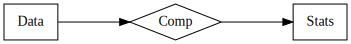

In [110]:
prev()

In [13]:
! head data/state_of_union.csv

date,name,words
"January 8, 1790",George Washington,1089
"December 8, 1790",George Washington,1401
"October 25, 1791",George Washington,2302
"November 6, 1792",George Washington,2101
"December 3, 1793",George Washington,1968
"November 19, 1794",George Washington,2918
"December 8, 1795",George Washington,1989
"December 7, 1796",George Washington,2871
"November 22, 1797",John Adams,2063


In [11]:
def prev():
    g = gvz.Digraph(engine='circo')
    g.node('a','SOU_text',shape='box')
    g.node('b','count_words',shape='hexagon')
    g.node('c','SOU_WC',shape='box')
    g.node('d','average words\ngroupby name',shape='hexagon')
    g.node('e','pres_WC',shape='box')
    g.edges(['ab','bc','cd','de'])
    return g

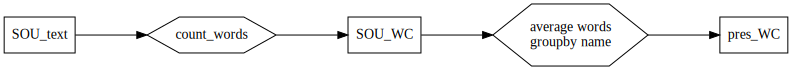

In [12]:
prev()

In [68]:
with open('../data/state_of_union.csv','r') as sou:
    header = sou.readline()
    sou_line = sou.readline()

In [69]:
print(header) # print header string
print(sou_line)

date,name,words

"January 8, 1790",George Washington,1089



In [70]:
type(header) # type checks the type of object

str

In [71]:
header = header.strip() # remove whitespace in front/back
header

'date,name,words'

In [72]:
header = header.split(',') # split the string by ,
header

['date', 'name', 'words']

In [73]:
header = tuple(header) # convert list to tuple
header

('date', 'name', 'words')

### Built in data structures:

**Sequences:**
- list
- tuple
- string

**Numeric:**
- boolean
- integer
- float

**Mappings: dictionaries**

**Exceptions, Classes**

In [111]:
print('"January 8, 1790",George Washington,1089') # first line

def proc_sou(line):
    """state of union line processing - in the future use Pandas"""
    line_date, line_rest = line.strip().split('",') # strip and split btw date/name
    line_date = line_date.strip('"') # remove "
    name, words = line_rest.split(',') # split name/words
    return(line_date,name,int(words)) # return - convert int

"January 8, 1790",George Washington,1089


In [50]:
with open('../data/state_of_union.csv','r') as sou:
    head_temp = sou.readline() # skip the first line
    sou_data = [proc_sou(line) for line in sou] # list comp - return to this

In [44]:
dates, names, words = zip(*sou_data) # zip and tuple unpacking

### Python [built in functions](https://docs.python.org/3/library/functions.html)

- zip: combines multiple sequences into sequence of tuples
- range(i,j): iterable from i to j-1
- format: insert variables into string
- print
- iter, next: iterable tools
- all, any, max, min, len

### Tuple

- sequence of mixed type
- tuple unpacking is a neat trick
- immutable
- think of as a single record of multiple variables

In [74]:
header

('date', 'name', 'words')

In [ ]:
x, y = 1, 2 #assign values
y, x = x, y #swap values
r, (x, y) = (x**2 + y**2)**0.5, (y, x) #nested value assignment and swapping
print(x, y, r)

In [74]:
header

('date', 'name', 'words')

In [75]:
header[1] = 'pres' # cannot modify tuple

TypeError: 'tuple' object does not support item assignment

In [76]:
header = (header[0], 'pres', header[2]) # reassign tuple
header

('date', 'pres', 'words')

- zip: combines multiple sequences into sequence of tuples
- unpack tuples in arguments with *
- `zip(*arg)` unzips

In [52]:
dates, names, words = zip(*sou_data) 
words = list(words)

In [51]:
for n,w in zip(names, words): # zip combines lists/iterables
    print("{} spoke {} words".format(n,w)) # format string method

George Washington spoke 1089 words
George Washington spoke 1401 words
George Washington spoke 2302 words
George Washington spoke 2101 words
George Washington spoke 1968 words
George Washington spoke 2918 words
George Washington spoke 1989 words
George Washington spoke 2871 words
John Adams spoke 2063 words
John Adams spoke 2218 words
John Adams spoke 1505 words
John Adams spoke 1372 words
Thomas Jefferson spoke 3224 words
Thomas Jefferson spoke 2197 words
Thomas Jefferson spoke 2263 words


### Lists

- sequences
- appendable, mutable
- slice-able
- think of as many rows of dataset

In [61]:
print(words)

[1089, 1401, 2302, 2101, 1968, 2918, 1989, 2871, 2063, 2218, 1505, 1372, 3224, 2197, 2263]


In [58]:
words[0] # select single element

1089

In [59]:
words[0:8] # select first 8

[1089, 1401, 2302, 2101, 1968, 2918, 1989, 2871]

In [55]:
words[-1] # select last

2263

In [63]:
words[-3:] # last 3

[3224, 2197, 2263]

In [64]:
words[::4] # every 4

[1089, 1968, 2063, 3224]

### Slicing: general form

`words[i:j:k]`: entries of words

- starting at i (indexing starts at 0)
- ending before j
- every k entries (stride)

In [77]:
words.insert(9,'NA') # insert 'NA' in 9th spot

In [79]:
print(words)

[1089, 1401, 2302, 2101, 1968, 2918, 1989, 2871, 2063, 'NA', 2218, 1505, 1372, 3224, 2197, 2263]


In [80]:
del words[9] # remove 9th element

In [81]:
print(words)

[1089, 1401, 2302, 2101, 1968, 2918, 1989, 2871, 2063, 2218, 1505, 1372, 3224, 2197, 2263]


In [91]:
stats = (len(words),sum(words), min(words), max(words)) # store tuple 
st_str = "Total words in first {} yrs: {}\nMin: {}\nMax: {}".format(*stats) # format string
print(st_str)

Total words in first 15 yrs: 31481
Min: 1089
Max: 3224


In [92]:
min_ind = words.index(stats[2]) # find index corresponding to value
dates[min_ind] + ' : ' + names[min_ind]

'January 8, 1790 : George Washington'

## Recap

We left off last time with

- `header`: string of header with , separated 
- `davis.dat`: file with lines containing UC Davis in college scorecard

In [24]:
## Let's extract and plot the undergraduate population from dataset

davis_lines = [] # empty list
with open('CollegeScorecard/davis.dat','r') as davis: # open file as davis
    for line in davis: # what?
        line_sp = line.split('.csv:') # split a string
        davis_lines.append(line_sp) # append to the end of the list

In [31]:
len(davis_lines) # length of list

21

In [32]:
davis_lines[0][0] # indexing starts at 0

'CollegeScorecard/MERGED1996_97_PP'

In [28]:
# alternative is to do list comp!

with open('CollegeScorecard/davis.dat','r') as davis:
    davis_lines = [line.split('.csv:') for line in davis] # list comprehension

In [71]:
## Looking at the output - list of lists
print(davis_lines[0][0])
print(davis_lines[0][1][:60]) # first 60 characters

CollegeScorecard/MERGED1996_97_PP
110644,00131300,001313,University of California-Davis,Davis,


In [39]:
sample_data = davis_lines[0][1].split(',') # split separates a string by commas
sample_data[0:10]  # first ten elements

['110644',
 '00131300',
 '001313',
 'University of California-Davis',
 'Davis',
 'CA',
 '95616-8678',
 'NULL',
 'NULL',
 'NULL']

In [40]:
header = header.strip() # remove trailing whitespace
header = header.split(',') # split the string on ,
header[0:10]  # first ten elements

['\ufeffUNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL']

In [44]:
UG_index = header.index('UGDS') # Find element of list with UGDS index
header[UG_index] # check

'UGDS'

In [45]:
sample_data[UG_index] # Davis undergrad population

'18738'

In [49]:
## Function, doc strings

def extract_UGDS(line, UG_index):
    """Extract the UGDS from line (variable at UG_index)"""
    data = line.split(',')
    if data[UG_index] == 'NULL':
        return 'NA'
    else:
        return int(data[UG_index])

In [50]:
UGDS_dat = [extract_UGDS(file[1],UG_index) for file in davis_lines]

In [51]:
UGDS_dat[3]

19393

In [52]:
davis_lines[0][0] # look at the filename portion

'CollegeScorecard/MERGED1996_97_PP'

In [54]:
davis_lines[0][0][-10:-6] # one way to get year

'1996'

In [55]:
def extract_year(line):
    """extract the year from line"""
    year_str = line[-10:-6]
    return int(year_str)

In [56]:
years = [extract_year(file[0]) for file in davis_lines]

In [64]:
na_id = UGDS_dat.index('NA') # Remove missing values
years[na_id]

2000

In [65]:
del years[na_id] # del removes that element from list
del UGDS_dat[na_id]

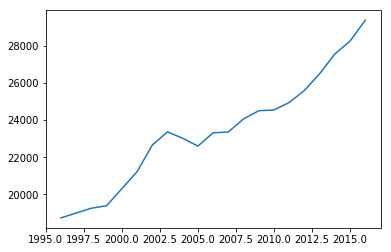

In [66]:
import matplotlib.pyplot as plt # matplotlib is plotting tool

plt.plot(years,UGDS_dat)
plt.show()

### List comprehensions
- `[func(a) for a in list if bool_expr(a)]`
- think of as mapping and filter

### Iterables

- iter(iterable) -> iterator
- next(iterator) : returns next element

In [113]:
[i**2 for i in range(10) if i % 2 == 1] # square of odds

[1, 9, 25, 49, 81]

In [50]:
with open('data/state_of_union.csv','r') as sou:
    head_temp = sou.readline() # skip the first line
    sou_data = [proc_sou(line) for line in sou] # list comp

In [ ]:
# is same as
with open('data/state_of_union.csv','r') as sou:
    head_temp = sou.readline() # skip the first line
    sou_data = []
    for line in sou:
        sou_data.append(proc_sou(line)) # append inserts at the end

In [114]:
## square first 10 non-neg ints
s = 0
for i in range(10):
    s += i**2
s

285

In [103]:
## square first 10 non-neg ints
s = 0
riter = iter(range(10)) # iter creates iterator
while True:
    s += next(riter)**2 # next returns next element

StopIteration: 

In [104]:
## square first 10 non-neg ints
s = 0
riter = iter(range(10))
while True:
    try:
        s += next(riter)**2
    except StopIteration: # Catch this exception
        break
s

285

In [105]:
## square first 10 non-neg ints
sum([i**2 for i in range(10)]) # list comp into sum

285

In [106]:
## square first 10 non-neg ints
sum(i**2 for i in range(10)) # generator expression into sum

285

In [93]:
# same thing as before
with open('../data/state_of_union.csv','r') as sou:
    sou_data = []
    sou_iter = iter(sou)
    head_temp = next(sou_iter) # skip the first line
    while True:
        try:
            line = next(sou_iter)
        except StopIteration:
            break
        sou_data.append(proc_sou(line))

In [107]:
# or just stick with
with open('../data/state_of_union.csv','r') as sou:
    head_temp = sou.readline() # skip the first line
    sou_data = [proc_sou(line) for line in sou] # list comp